**Experiment#1: GB classification using Kaggle data with HypGB**


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/heart_failure_Fsd.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df1 = df.copy()

In [ ]:
new_columns = ['TIME','T','SEX','SMOK','DBT','HBP','ANM','AGE','EF','SS','CPK','PLTS','CPK']

df1.columns = new_columns
df1.head()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,CPK,PLTS,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
df1.describe()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,CPK,PLTS,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


**LASSO Feature Selection Method**

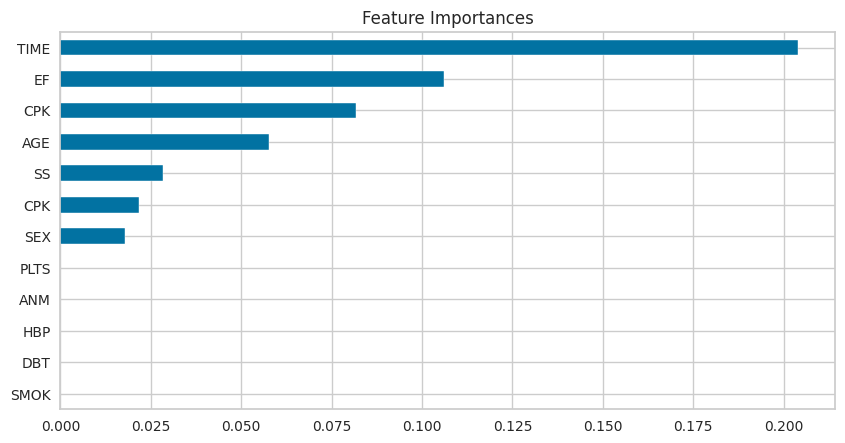

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Split the data into input features and output variable
X = df1.drop("T", axis=1)
y = df1["T"]

# Standardize the input features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit the Lasso model to the data
lasso = Lasso(alpha=0.01)
lasso.fit(X_std, y)

# Get the feature importance scores
feature_scores = pd.Series(index=X.columns, data=np.abs(lasso.coef_))

# Plot the feature importances
plt.figure(figsize=(10, 5))
feature_scores.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.show()

In [ ]:
# Sort the features by their score in descending order
sorted_features = feature_scores.sort_values(ascending=False)

# Print the sorted features and their scores
print("Feature importance score:")
print(sorted_features)

Feature importance score:
TIME    0.204062
EF      0.106148
CPK     0.081665
AGE     0.057768
SS      0.028278
CPK     0.021860
SEX     0.017823
SMOK    0.000000
DBT     0.000000
HBP     0.000000
ANM     0.000000
PLTS    0.000000
dtype: float64


In [ ]:
# Split the data into input features and output variable
X = df1.drop("T", axis=1)
y = df1["T"]


In [ ]:
# --- Drop Unnecessary features ---
X= X.drop(columns = ['PLTS', 'ANM'])
X.head()

,TIME,SEX,SMOK,DBT,HBP,AGE,EF,SS,CPK,CPK
0,97,0,0,0,0,43.0,50,135,1.30,358
1,180,1,1,1,0,73.0,30,142,1.18,231
2,31,1,1,0,1,70.0,20,134,1.83,582
3,87,1,0,0,0,65.0,25,141,1.10,305
4,113,1,0,0,0,64.0,60,137,1.00,1610


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier()

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)

print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)

# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)

Accuracy of GB: 0.9
Precision of GB: 0.8823529411764706
Recall of GB: 0.7894736842105263
F1-score of GB: 0.8333333333333333
AUC-ROC of GB: 0.8703465982028241
MCC of GB: 0.7646248280490423
Prediction Time: 6.341934204101562e-05


In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier( n_estimators=350,learning_rate=0.02508957, max_depth=2, loss='exponential',
                                          min_samples_leaf=1, max_leaf_nodes=3, min_samples_split=9, subsample= 0.60597313, max_features='sqrt')

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)

print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)

# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)

Accuracy of GB: 0.9333333333333333
Precision of GB: 0.9411764705882353
Recall of GB: 0.8421052631578947
F1-score of GB: 0.8888888888888888
AUC-ROC of GB: 0.9088575096277277
MCC of GB: 0.844135208782045
Prediction Time: 3.8623809814453125e-05


**HyperOPt-GB**

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from functools import partial
from sklearn.model_selection import cross_val_score

In [ ]:
# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'random_state': hp.choice('random_state', range(100)),
    'loss': hp.choice('loss', ['deviance', 'exponential']),
}

# Define the objective function to minimize
def objective(params):
    params['n_estimators'] = round(params['n_estimators'])
    params['max_depth'] = round(params['max_depth'])
    params['min_samples_split'] = round(params['min_samples_split'])
    params['min_samples_leaf'] = round(params['min_samples_leaf'])
    clf = GradientBoostingClassifier(**params)
    score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    return -score

In [ ]:
# Run hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=50)

# Print the best hyperparameters
print(best)

100%|██████████| 50/50 [01:27<00:00,  1.74s/it, best loss: -0.8620567375886525]
{'learning_rate': 0.013381115925556025, 'loss': 1, 'max_depth': 8.0, 'max_features': 1, 'min_samples_leaf': 10.0, 'min_samples_split': 6.0, 'n_estimators': 250.0, 'random_state': 74, 'subsample': 0.502633684931993}


In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier( n_estimators=205,learning_rate=0.013381115925556025, max_depth=8, loss='exponential',
                                          min_samples_leaf=10, max_leaf_nodes=3, min_samples_split=6, random_state=74, subsample= 0.502633684931993, max_features='log2')

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)

print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)

# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)

Accuracy of GB: 0.9
Precision of GB: 0.9333333333333333
Recall of GB: 0.7368421052631579
F1-score of GB: 0.8235294117647058
AUC-ROC of GB: 0.8562259306803595
MCC of GB: 0.7653716435003121
Prediction Time: 5.459785461425781e-05


In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier( n_estimators=270,learning_rate=0.02508957, max_depth=6, loss='exponential',
                                          min_samples_leaf=7, max_leaf_nodes=2, min_samples_split=8, random_state=489, subsample= 0.30597313, max_features='log2')

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)

print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)

# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)

Accuracy of GB: 0.9166666666666666
Precision of GB: 1.0
Recall of GB: 0.7368421052631579
F1-score of GB: 0.8484848484848484
AUC-ROC of GB: 0.868421052631579
MCC of GB: 0.8104014882034583
Prediction Time: 6.461143493652344e-05
